## Gaussian Blur

In OpenCV, the function **`GaussianBlur`** API convolves the source image with the specified Gaussian Kernel.
> Syntax:
``` python
dst =   cv2.GaussianBlur(   src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]   )
```


### Parameters
* **`src`** nput image; the image can have any number of channels, which are processed independently, but the depth should be CV_8U, CV_16U, CV_16S, CV_32F or CV_64F.
* **`dst`** output image of the same size and type as src.
* **`ksize `** Gaussian kernel size. ksize.width and ksize.height can differ but they both must be positive and odd. Or, they can be zero's and then they are computed from sigma.

* **`sigmaX`** Gaussian kernel standard deviation in X direction.
* **`sigmaY`** Gaussian kernel standard deviation in Y direction; if sigmaY is zero, it is set to be equal to sigmaX, if both sigmas are zeros, they are computed from ksize.width and ksize.height, respectively; to fully control the result regardless of possible future modifications of all this semantics, it is recommended to specify all of ksize, sigmaX, and sigmaY.
* **`delta`** optional value added to the filtered pixels before storing them in dst.
* **`borderType`** pixel extrapolation method (see borderInterpolate for details).

Refer [cv2.GaussianBlur](https://docs.opencv.org/4.1.0/d4/d86/group__imgproc__filter.html#gaabe8c836e97159a9193fb0b11ac52cf1)

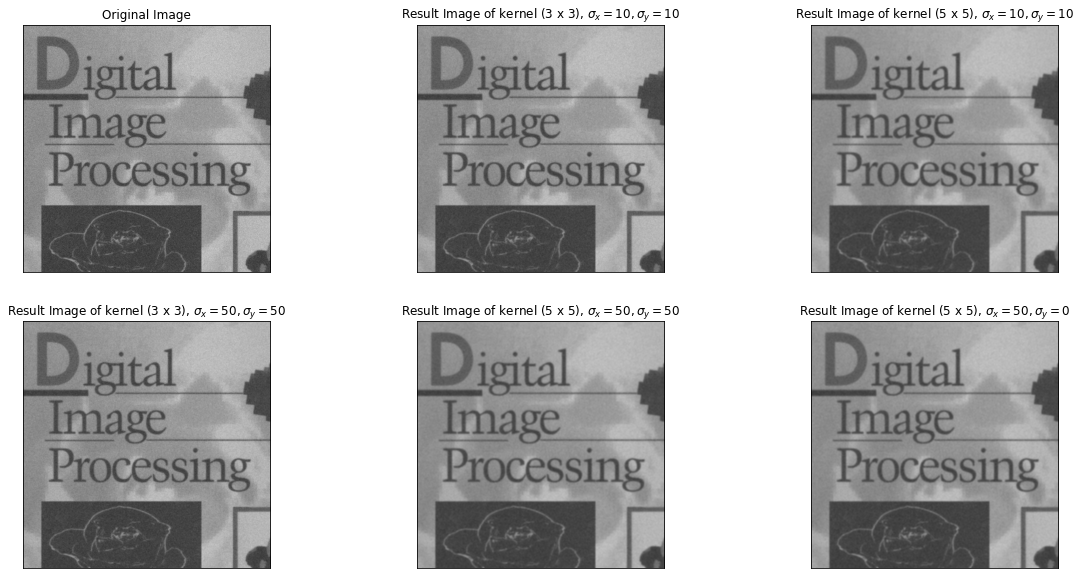

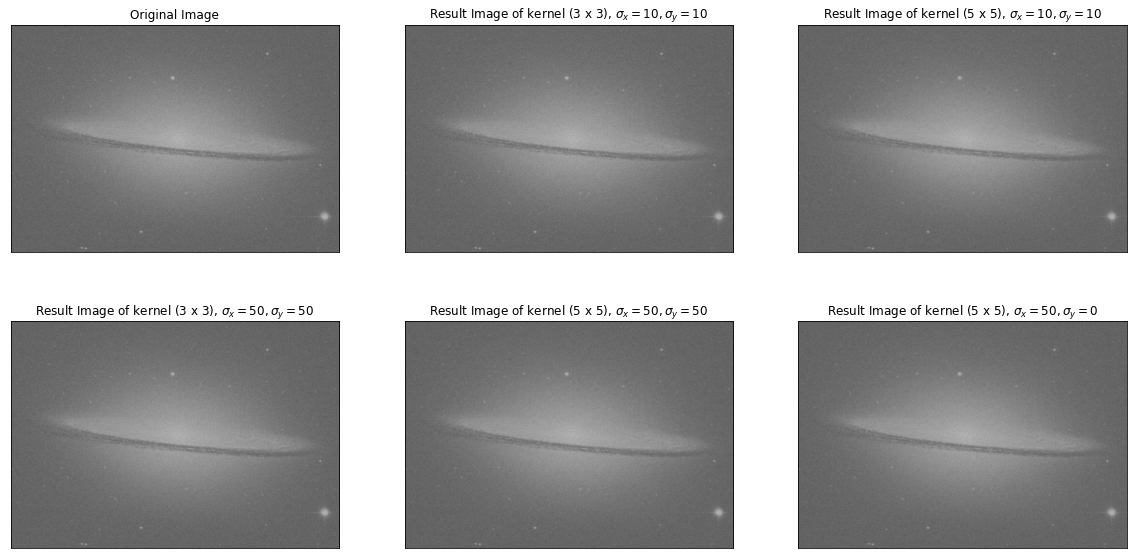

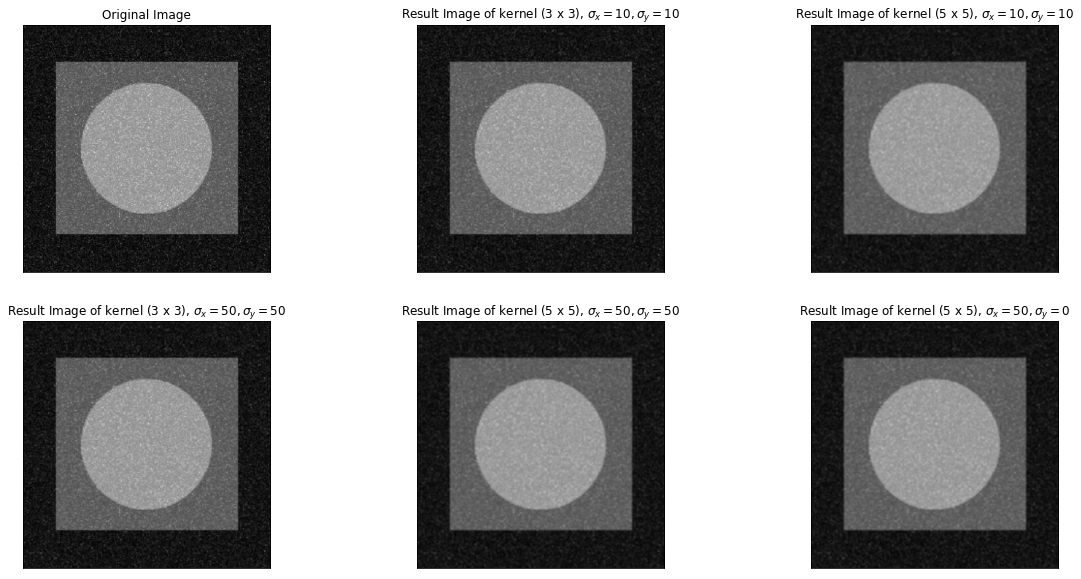

In [1]:
##########################################################################################
# Primary Contact    : v_s191@txstate.edu; vittal.siddaiah@gmail.com;
##########################################################################################
#Image Filtering using Convolution
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
##############################################################################################

##############################################################################################
def GaussianImageFilter(rawImageData, trials):
    figIds = []
    # Generating FigureId's
    maxRows = math.ceil(len(trials)/3)
    figCounter = 0
    for row in range(maxRows):
        for col in range(3):
            figIds.append((maxRows*100)+30+(figCounter + 1))
            figCounter +=1
    plt.figure(figsize=[20,10])          
    counter = 0    
    for trial in trials:
        if (trial[0] > 0):
            kernelSize = trial[0]
            sigmaX = trial[1]
            sigmaY = trial[2]
            kernel = np.ones((kernelSize, kernelSize), dtype=np.float32) / kernelSize**2 
            #print(kernel)
            strKernel = r"Result Image of kernel (%d x %d), $\sigma_x =%d,  \sigma_y =%d$" % (kernelSize, kernelSize,sigmaX,sigmaY)
            plt.subplot(figIds[counter]);
            resultImageData = cv2.GaussianBlur(imageData,(kernelSize,kernelSize),sigmaX,sigmaY)
        else:
            strKernel = "Original Image"
            plt.subplot(figIds[counter]);
            resultImageData = rawImageData
        plt.imshow(resultImageData[..., ::-1])
        plt.xticks([]), plt.yticks([]) #To remove the ticks
        plt.title(strKernel)
        counter += 1
    return 

# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")

##############################################################################################  
# Design of Experiment
##############################################################################################  
#trial = [kernelSize, sigmaX, sigmaY]
trial0 = [ 0, 0, 0] #Original Image
trial1 = [ 3, 10, 10] 
trial2 = [ 5, 10, 10] 
trial3 = [ 3, 50, 50] 
trial4 = [ 5, 50, 50] 
trial5 = [ 5, 50, 0] 
##############################################################################################

##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/book-cover-gaussian.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
GaussianImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])
##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/sombrero-galaxy-noisy.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
GaussianImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])
##############################################################################################


##############################################################################################
# Reading the Image
imageData = cv2.imread("../../../Images/test-pattern-gamma-noise.tif")  #Color Image is Scanned
if imageData is None: print("Unable to open the image! please verify !!!")
    
GaussianImageFilter(imageData, [trial0, trial1, trial2, trial3, trial4, trial5])
##############################################################################################

